## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  李志伟
+ 学号  0165177

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [1]:
import csv
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
sentinels = {'sweight': [' '], 'c19':[' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)


blank_1 = []
blank_2 = []
for i in range(0,30):
    sple=df.sample(n=1000)      #抽取1000个样本

    dfg= pd.DataFrame({
        'x1': sple.c19,
        'x2': sple.sweight,
    })
    dfg=dfg.dropna(axis=0,how='any')#删除缺失值
    
    b=dfg["x1"].tolist()
    w=np.mean(b)
    blank_1.append(w)       # c19的30个均值
    
    r=dfg['x2'].tolist()
    q=np.mean(r)
    blank_2.append(q)     # sweight的30个均值
print(blank_1)
print(blank_2)

C:\Users\27824\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[11.146845915201654, 10.915025906735751, 11.48041237113402, 11.273846153846154, 11.558307533539733, 11.206185567010309, 11.595701125895598, 11.164102564102564, 11.48360655737705, 10.259565667011376, 11.029804727646454, 10.531762295081966, 10.605997931747673, 11.3585291113381, 10.364572605561277, 11.29296066252588, 11.088174273858922, 11.617768595041323, 10.701646090534979, 11.403526970954356, 10.317901234567902, 10.375776397515528, 10.37321063394683, 11.455578512396695, 10.965732087227414, 10.893551688843399, 10.312631578947368, 11.561855670103093, 10.33230452674897, 11.07415036045314]
[1578.1286549178628, 1674.3920219381866, 1603.089077908232, 1561.824429943379, 1640.7182384172104, 1643.4208687811795, 1601.9892793302047, 1566.9292112927571, 1533.0778582017942, 1567.1761460092237, 1601.3668256604792, 1570.8649338112511, 1616.3887774438876, 1645.1612981069575, 1657.6300839032265, 1607.2625147936028, 1635.708691628643, 1576.3790296365416, 1602.9519995701178, 1620.5918019362025, 1661.5401

C:\Users\27824\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


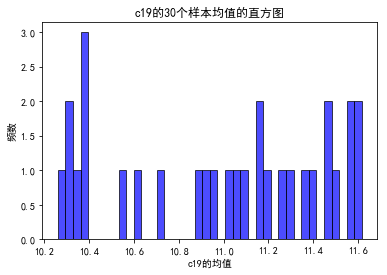

In [4]:
plt.hist(blank_1, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("c19的均值")
# 显示纵轴标签
plt.ylabel("频数")

plt.title("c19的30个样本均值的直方图")
plt.show()

C:\Users\27824\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


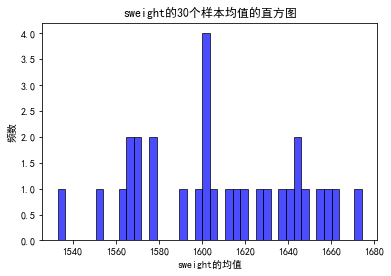

In [5]:
plt.hist(blank_2, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("sweight的均值")
# 显示纵轴标签
plt.ylabel("频数")

plt.title("sweight的30个样本均值的直方图")
plt.show()

In [6]:
#计算均值和方差
sum = 0.0
for value in blank_1:
    sum += value
mean_mean_1 = sum / 30
var1_mean = np.var(blank_1)

sum = 0.0
for value in blank_2:
    sum += value
mean_mean_2 = sum / 30
var2_mean = np.var(blank_2)

print("变量c19的均值是：", mean_mean_1)
print("变量c19的方差是：", var1_mean)

print("变量sweight的均值是：", mean_mean_2)
print("变量sweight的方差是：", var2_mean)



变量c19的均值是： 10.991367843896516
变量c19的方差是： 0.20641814363647695
变量sweight的均值是： 1608.2929754254585
变量sweight的方差是： 1275.0845369548138


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [7]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
from itertools import islice
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

In [8]:
#自变量：b06:母亲的教育水平  b07：父亲的教育水平   b12：家中藏书 b2301：对待作业考试的严厉程度
#因变量：c12：目前成绩所处水平


sentinels = {'c12': [' '], 'b06': [' '], 'b07': [' '] ,'b12': [' '],'b2301':[' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
dfg = df.sample(n=1000)

sple = pd.DataFrame({
    'y': dfg.c12,
    'x1': dfg.b06,
    'x2': dfg.b07,
    'x3': dfg.b12,
    'x4': dfg.b2301
})
sple=sple.dropna(axis=0,how='any')#删除缺失值


model_x = ['x1','x2','x3','x4']
x = sple.loc[ :,model_x].values
#构建因变量
y = sple['y'].values



model = sm.OLS(y, x) 
#拟合ols回归
results = model.fit()
results.params

#输出结果
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1506.
Date:                Mon, 31 Dec 2018   Prob (F-statistic):               0.00
Time:                        00:39:34   Log-Likelihood:                -1539.6
No. Observations:                 967   AIC:                             3087.
Df Residuals:                     963   BIC:                             3107.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0694      0.027      2.593      0.0

C:\Users\27824\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,124,125,126,127,128,129,130,131,138,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#1.模型拟合指标： 决定系数R-squared=0.862>0.8，说明模型的拟合效果较好。
#2.模型的显著性检验结果:该模型的P值为小于0.05,所以在该模型中自变量有显著线性关系作用.
#3、变量的系数： x1的系数为:0.0694, 
           x2的系数为:0.0778,
           x3的系数为：0.1848, 
           x4的系数为：0.7074
#4、各系数的显著性检验结果： 全部 p值<0.05，说明这4个自变量的效果都是显著的。
#5、对模型结果的解释： 与现实生活经验相符，父母对孩子的作业考试的态度与孩子最后的学习成绩息息相关，而家中的氛围也有一定的关系。